# A. Physical Lecture: Minimum Variance Frontier: Constrained

An investor considers an investment into three already well diversified exchange traded funds. Asset 1 has an expected return of 3%, a volatility of 4% and pairwise correlations to asset 2 and 3 of 10% and 20%, respectively. Asset 2 has an expected return of 6%, a volatility of 13% and a pairwise correlation with asset 3 of 70%.  Asset 3 has an expected return of 8% and a volatility of 16%.

The investor wants to inspect a subset of minimum variance portfolios. The subset of interest must not contain any short sale positions and none of the positions shall make up more than 90% of the investment. 

# Investment Opportunity Set
- Expected Returns mu
- Covariance Matrix Sigma
- Risk-free Rate rf

In [165]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [166]:
mu = pd.Series(data=[0.03, 0.06, 0.08], name=r'E[R]')

In [260]:
Sigma = np.array([
                    [0.04**2,         0.04*0.13*0.1, 0.04*0.16*0.2],
                    [0.04*0.13*0.1,  0.13**2,        0.13*0.16*0.7],
                    [0.04*0.16*0.2,  0.13*0.16*0.7, 0.16**2]    
                    ])

# Optimization Problem

In [261]:
def volatility(w, Sigma=Sigma):
    return (w.T @ Sigma @ w)**0.5

In [262]:
def full_investment(w):
    return sum(w) - 1

In [263]:
def weighting_constraint(w):
    return 0.9 - max(w)

In [264]:
def short_sale_constraint(w):
    return w.min()

In [265]:
init = [0.4, 0.3, 0.3]
minimum = minimize(fun=variance, x0=init, constraints=[ dict(type='eq', fun=full_investment),
                                                        dict(type='ineq', fun=weighting_constraint),
                                                        dict(type='ineq', fun=short_sale_constraint),
                                                      ])

In [266]:
gmv = minimum.x

In [267]:
gmv_variance = volatility(gmv)
gmv_variance

0.0394791083992534

In [268]:
gmv_mu = minimum.x.T @ mu
gmv_mu

0.033

## With target return

In [269]:
from functools import partial

In [270]:
def target_return_constraint(w, target):
    return (w.T @ mu) - target

In [271]:
bounds = [(0, 0.9),
          (0, 0.9),
          (0, 0.9)]

In [272]:
mu_LB = 0.033  
mu_UB = 0.078
target_steps = np.linspace(mu_LB, mu_UB, 50)
len(target_steps)

50

In [273]:
init = [0.3, 0.3, 0.4]
def mv_minimize(mu_target):
    res = minimize(fun=volatility, x0=init, constraints=[ dict(type='eq', fun=full_investment),
                                                          dict(type='eq', fun=partial(target_return_constraint, target=mu_target)),
                                                      ],
                  bounds=bounds)
    return res

In [274]:
volas = np.zeros(50)
mus = np.zeros(50)

In [275]:
for i, mu_target in enumerate(target_steps):
    res = mv_minimize(mu_target)
    std = volatility(res.x)
    volas[i] = std
    ER = res.x.T @ mu
    assert ER - mu_target < 0.01
    mus[i] = ER

In [276]:
mu

0    0.03
1    0.06
2    0.08
Name: E[R], dtype: float64

# Plotting results

In [277]:
import matplotlib.pyplot as plt

Text(0.5, 0, '$\\sigma^2$')

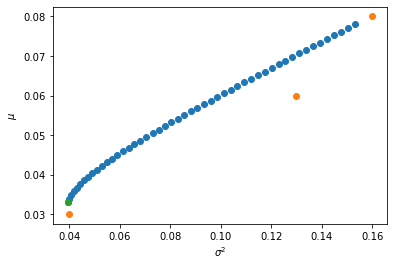

In [278]:
plt.scatter(volas, mus)
plt.scatter(np.diag(Sigma)**0.5, mu)
plt.scatter(gmv_variance, gmv_mu)
plt.ylabel(r'$\mu$')
plt.xlabel(r'$\sigma^2$')

In [279]:
variances

array([0.0517    , 0.05516168, 0.06933827, 0.07418296, 0.07914739,
       0.08397688, 0.08867142, 0.09323102, 0.09765568, 0.10194539,
       0.10610016, 0.11011998, 0.11400486, 0.1177548 , 0.1213698 ,
       0.12484985, 0.12819495, 0.13140511, 0.13448033, 0.13742061,
       0.14022594, 0.14289633, 0.14543177, 0.14783227, 0.15009783,
       0.15222844, 0.15422411, 0.15608483, 0.15781061, 0.15940145,
       0.16085734, 0.16217829, 0.1633643 , 0.16441536, 0.16533148,
       0.16611265, 0.16675888, 0.16727017, 0.16764651, 0.16788791,
       0.16799437, 0.16796588, 0.16780245, 0.16750407, 0.16707075,
       0.16650249, 0.1734429 , 0.20131816, 0.22913719, 0.2569    ])